In [ ]:
# Updatek depek
%pip install seaborn --upgrade

In [144]:
import pandas as pd
from ipywidgets import interactive, Dropdown, IntSlider, Button, Box, Label
from IPython.display import display, clear_output

In [86]:
from core.analysis.salary import SalaryPlots
from core.analysis.attrition import AttritionPlots
from core.analysis.distance_from_home import DistanceFromHomePlots
from core.analysis.education import EducationPlots
from core.analysis.experience import ExperiencePlots

In [171]:
class StatApp:
    def __init__ (self):
        self.df = pd.read_csv('../dataset-normalized.csv')
        self.job_roles = self.df['JobRole'].unique()
        self.job_levels = self.df['JobLevel'].unique()
        self.available_job_levels = []
        self.min_salary = 0
        self.max_salary = 0
        self.min_age = 0
        self.max_age = 0
        self.genders = self.df['Gender'].unique()

        self.salary = SalaryPlots(self.df)
        self.attrition = AttritionPlots(self.df)
        self.distance_from_home = DistanceFromHomePlots(self.df)
        self.education = EducationPlots(self.df)
        self.experience = ExperiencePlots(self.df)
        
        self.state = {
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'genderDropdown': None,
            'salarySlider': None,
            'ageSlider': None
        }
        
        self.layout = {
            'jobRoleDropdown': None,
            'jobLevelDropdown': None,
            'genderDropdown': None,
            'salarySlider': None,
            'ageSlider': None,
            'btnPlotSalary': None,
            'btnPlotGender': None,
            'btnPlotAge': None,
            'btnPlotAttrition': None,
            'btnPlotAttritionRankings': None
        }
        
    def find_layout_element (self, target):
        for key, value in self.layout.items():
            if value == target:
                return key
    
    def handle_change (self, data):
        target = self.find_layout_element(data.owner)
        
        if target is not None:
            self.state[target] = data.new

        if data.owner == self.layout['jobRoleDropdown']:
            self.available_job_levels = self.df.loc[self.df['JobRole'] == data.new]['JobLevel'].unique()
            self.min_salary = self.df.loc[self.df['JobRole'] == data.new]['MonthlyIncome'].min()
            self.max_salary = self.df.loc[self.df['JobRole'] == data.new]['MonthlyIncome'].max()
            self.min_age = self.df.loc[self.df['JobRole'] == data.new]['Age'].min()
            self.max_age = self.df.loc[self.df['JobRole'] == data.new]['Age'].max()
            self.state['jobLevelDropdown'] = None
            self.render()
            
    def plot_salary (self, _data):
        self.render()
        self.salary.plot_salary(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['jobLevelDropdown']
        )
        
    def plot_salary_age (self, _data):
        self.render()
        self.salary.plot_salary_vs_age(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['ageSlider']
        )
        
    def plot_salary_gender (self, _data):
        self.render()
        self.salary.plot_salary_vs_gender(
            self.state['salarySlider'],
            self.state['jobRoleDropdown'],
            self.state['genderDropdown']
        )
    
    def plot_attrition (self, _data):
        self.render()
        self.attrition.plot_attrition(
            self.state['jobRoleDropdown'],
            self.state['jobLevelDropdown']
        )

    def plot_attrition_rankings (self, _data):
        self.render()
        self.attrition.attrition_rankings(
            self.state['jobRoleDropdown']
        )

    def render (self):
        clear_output()
        
        labels = [
            Label('For Salary vs Job Role fill: salary, job role, job level'),
            Label('For Salary vs Gender fill: salary, job role, gender'),
            Label('For Salary vs Age fill: salary, job role, age'),
            Label('For Attrition, Job Role fill: job role, job level'),
            Label('For Attrition Rankings fill: job role')
        ]

        self.layout['jobRoleDropdown'] = Dropdown(
            options=self.job_roles,
            description='Job Role:',
            value=self.state['jobRoleDropdown']
        )
        self.layout['jobLevelDropdown'] = Dropdown(
            options=self.available_job_levels,
            description='Job Level:',
            disabled=len(self.available_job_levels) == 0,
            value=self.state['jobLevelDropdown']
        )
        self.layout['genderDropdown'] = Dropdown(
            options=[None, *self.genders],
            description='Gender:',
            disabled=len(self.genders) == 0,
            value=self.state['genderDropdown']
        )
        self.layout['salarySlider'] = IntSlider(
            value=self.state['salarySlider'],
            min=self.min_salary,
            max=self.max_salary,
            step=1,
            description='Salary:',
            disabled=self.state['jobRoleDropdown'] == None
        )
        self.layout['ageSlider'] = IntSlider(
            value=self.state['ageSlider'],
            min=self.min_age,
            max=self.max_age,
            step=1,
            description='Age:',
            disabled=self.state['jobRoleDropdown'] == None
        )
        self.layout['btnPlotSalary'] = Button(
            description='Salary vs Job Role',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Job Level',
            icon='check'
        )
        self.layout['btnPlotGender'] = Button(
            description='Salary vs Gender',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Gender',
            icon='check'
        )
        self.layout['btnPlotAge'] = Button(
            description='Salary vs Age',
            disabled=False,
            button_style='info',
            tooltip='Plot Salary vs Job Role & Age',
            icon='check'
        )
        self.layout['btnPlotAttrition'] = Button(
            description='Attrition, Job Role',
            disabled=False,
            button_style='info',
            tooltip='Attrition, Job Role, Job Level',
            icon='check'
        )
        self.layout['btnPlotAttritionRankings'] = Button(
            description='Attrition Rankings',
            disabled=False,
            button_style='info',
            tooltip='Attrition Rankings',
            icon='check'
        )
        
        self.layout['btnPlotSalary'].on_click(self.plot_salary)
        self.layout['btnPlotGender'].on_click(self.plot_salary_gender)
        self.layout['btnPlotAge'].on_click(self.plot_salary_age)
        self.layout['btnPlotAttrition'].on_click(self.plot_attrition)
        self.layout['btnPlotAttritionRankings'].on_click(self.plot_attrition_rankings)

        for key in self.layout.keys():
            self.layout[key].observe(self.handle_change, names='value')

        layout = []
        labels_i = 0
        
        for key in self.layout.keys():
            layout.append(self.layout[key])
            
            if key.startswith('btn'):
                layout.append(labels[labels_i])
                labels_i += 1
            
        display(*layout)
        
app = StatApp()

app.render()

# salary.plot_salary
# salary: int, job_role: str, job_lvl: int

# salary.plot_salary_vs_age
# salary: int, job_role: str, age: num = None

# salary.plot_salary_vs_gender
# salary: int, job_role: str, gender=None)

# StatApp().salary.plot_salary_vs_gender(8300, 'Manufacturing Director')

# attrition.plot_attrition
# job_role: str, job_level: int

# attrition.attrition_rankings
# job_role: str

# StatApp().attrition.attrition_rankings('Laboratory Technician')


# StatApp().distance_from_home.plot_distance(20, 'Female', 4)

# StatApp().education.plot_satisfaction_education(2, 3, 4, 'Medical', 5)
# StatApp().education.plot_satisfaction_education(2, 3, 4, 'Human Resources', 1)
# StatApp().education.plot_eductaion_salary(3300, 'Marketing', 5)
# StatApp().education.plot_eductaion_job_level(2, 'Marketing', 5)
# StatApp().education.plot_attrition('Medical', 5)
# StatApp().education.plot_attrition('Medical', 4)
# StatApp().education.plot_education_overtme('Medical', 5)

# StatApp().experience.plot_total_working_years_salary_dep(3500, 8, 1)

Dropdown(description='Job Role:', options=('Sales Executive', 'Research Scientist', 'Laboratory Technician', '…

Dropdown(description='Job Level:', disabled=True, options=(), value=None)

Dropdown(description='Gender:', options=(None, 'Female', 'Male'), value=None)

IntSlider(value=0, description='Salary:', disabled=True, max=0)

IntSlider(value=0, description='Age:', disabled=True, max=0)

Button(button_style='info', description='Salary vs Job Role', icon='check', style=ButtonStyle(), tooltip='Plot…

Label(value='For Salary vs Job Role fill: salary, job role, job level')

Button(button_style='info', description='Salary vs Gender', icon='check', style=ButtonStyle(), tooltip='Plot S…

Label(value='For Salary vs Gender fill: salary, job role, gender')

Button(button_style='info', description='Salary vs Age', icon='check', style=ButtonStyle(), tooltip='Plot Sala…

Label(value='For Salary vs Age fill: salary, job role, age')

Button(button_style='info', description='Attrition, Job Role', icon='check', style=ButtonStyle(), tooltip='Att…

Label(value='For Attrition, Job Role fill: job role, job level')

Button(button_style='info', description='Attrition Rankings', icon='check', style=ButtonStyle(), tooltip='Attr…

Label(value='For Attrition Rankings fill: job role')

Dropdown(description='Gender:', index=1, options=('Female', 'Male'), value='Male')

Box(children=(Label(value='Your distance from home:'), IntSlider(value=15, max=29, min=1)))

Box(children=(Label(value='Your years at company:'), IntSlider(value=0, max=40)))

Button(button_style='info', description='Check', icon='check', style=ButtonStyle(), tooltip='Check distance fr…

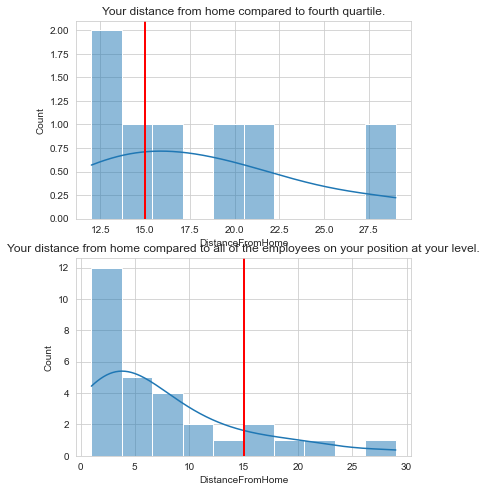

82.76% Male working in company for 0 years has less distance from home, 13.79% of them has higher distance from home than you.


In [170]:
class DistanceStatApp:
    def __init__ (self):
        self.df = pd.read_csv('../dataset-normalized.csv')
        self.genders = self.df['Gender'].unique()
        self.min_distance_from_home = self.df['DistanceFromHome'].min()
        self.max_distance_from_home = self.df['DistanceFromHome'].max()
        self.min_years_at_company = self.df['YearsAtCompany'].min()
        self.max_years_at_company = self.df['YearsAtCompany'].max()

        self.distance_from_home = DistanceFromHomePlots(self.df)
        
        self.state = {
            'genderDropdown': None,
            'distanceFromHomeSlider': None,
            'yearsAtCompanySlider': None
        }
        
        self.layout = {
            'genderDropdown': None,
            'distanceFromHomeSlider': None,
            'yearsAtCompanySlider': None,
            'btnPlotDistanceFromHome': None
        }
        
    def find_layout_element (self, target):
        for key, value in self.layout.items():
            if value == target:
                return key
    
    def handle_change (self, data):
        target = self.find_layout_element(data.owner)
        
        if target is not None:
            self.state[target] = data.new
            
    def plot_distance_from_home (self, _data):
        self.render()
        self.distance_from_home.plot_distance(
            self.state['distanceFromHomeSlider'],
            self.state['genderDropdown'],
            self.state['yearsAtCompanySlider']
        )

    def render (self):
        clear_output()

        self.layout['genderDropdown'] = Dropdown(
            options=self.genders,
            description='Gender:',
            disabled=len(self.genders) == 0,
            value=self.state['genderDropdown']
        )
        self.layout['distanceFromHomeSlider'] = IntSlider(
            value=self.state['distanceFromHomeSlider'],
            min=self.min_distance_from_home,
            max=self.max_distance_from_home,
            step=1,
        )
        self.layout['yearsAtCompanySlider'] = IntSlider(
            value=self.state['yearsAtCompanySlider'],
            min=self.min_years_at_company,
            max=self.max_years_at_company,
            step=1,
        )
        layout = [
            Box(
                [
                    Label(value='Your distance from home:'),
                    self.layout['distanceFromHomeSlider']
                ]
            ),
            Box(
                [
                    Label(value='Your years at company:'),
                    self.layout['yearsAtCompanySlider']
                ]
            )
        ]
        self.layout['btnPlotDistanceFromHome'] = Button(
            description='Check',
            disabled=False,
            button_style='info',
            tooltip='Check distance from home',
            icon='check'
        )
        
        self.layout['btnPlotDistanceFromHome'].on_click(self.plot_distance_from_home)
        
        to_display = []

        for key in self.layout.keys():
            if key not in ['distanceFromHomeSlider', 'yearsAtCompanySlider']:
                to_display.append(self.layout[key])
            elif key == 'distanceFromHomeSlider':
                [to_display.append(i) for i in layout]
            self.layout[key].observe(self.handle_change, names='value')

        display(*to_display)
        
app = DistanceStatApp()

app.render()